In [77]:
from pprint import pprint

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [26]:
sentences = [
    "The future king is the prince"
    ,"Daughter is the princess"
    ,"Son is the prince"
    ,"Only a man can be a king"
    ,"Only a woman can be a queen"
    ,"The princess will be a queen"
    ,"The prince is a strong man"
    ,"The princess is a beautiful woman"
    ,"Prince is only a boy now"
    ,"Prince will be a king"
    ,"A boy will be a man"
]

In [27]:
for index, sent in enumerate(sentences):
    sentences[index] = sent.lower()

In [28]:
sentences

['the future king is the prince',
 'daughter is the princess',
 'son is the prince',
 'only a man can be a king',
 'only a woman can be a queen',
 'the princess will be a queen',
 'the prince is a strong man',
 'the princess is a beautiful woman',
 'prince is only a boy now',
 'prince will be a king',
 'a boy will be a man']

### Remove stopwords from the sentences

In [29]:
stopwords = ['the', 'is', 'an', 'a', 'i', 'are', 'can', 'at', 'their', 'only', 'will', 'be', 'now']

In [30]:
cleaned_sents = []

for index, sent in enumerate(sentences):
    clean_sent = []
    for word in sent.split():
        if word not in stopwords:
            clean_sent.append(word)
    cleaned_sents.append(' '.join(clean_sent))


cleaned_sents
            

['future king prince',
 'daughter princess',
 'son prince',
 'man king',
 'woman queen',
 'princess queen',
 'prince strong man',
 'princess beautiful woman',
 'prince boy',
 'prince king',
 'boy man']

### Create Bigrams

In [31]:
bigrams = []

for index, sent in enumerate(cleaned_sents):
    words = sent.split()
    for i in range(len(words)-1):
        for j in range(i+1, len(words)):
            bigrams.append([words[i], words[j]])
            bigrams.append([words[j], words[i]])

bigrams

[['future', 'king'],
 ['king', 'future'],
 ['future', 'prince'],
 ['prince', 'future'],
 ['king', 'prince'],
 ['prince', 'king'],
 ['daughter', 'princess'],
 ['princess', 'daughter'],
 ['son', 'prince'],
 ['prince', 'son'],
 ['man', 'king'],
 ['king', 'man'],
 ['woman', 'queen'],
 ['queen', 'woman'],
 ['princess', 'queen'],
 ['queen', 'princess'],
 ['prince', 'strong'],
 ['strong', 'prince'],
 ['prince', 'man'],
 ['man', 'prince'],
 ['strong', 'man'],
 ['man', 'strong'],
 ['princess', 'beautiful'],
 ['beautiful', 'princess'],
 ['princess', 'woman'],
 ['woman', 'princess'],
 ['beautiful', 'woman'],
 ['woman', 'beautiful'],
 ['prince', 'boy'],
 ['boy', 'prince'],
 ['prince', 'king'],
 ['king', 'prince'],
 ['boy', 'man'],
 ['man', 'boy']]

### Vocabulary

In [33]:
words = []

for grm in bigrams:
    words.extend(grm)

words = list(set(words))
words.sort()
words

['beautiful',
 'boy',
 'daughter',
 'future',
 'king',
 'man',
 'prince',
 'princess',
 'queen',
 'son',
 'strong',
 'woman']

In [35]:
### One-Hot Encoding

In [38]:
# Let us assign a token to each of our word

words_dict = {}

for index, word in enumerate(words):
    words_dict[word] = index

words_dict

{'beautiful': 0,
 'boy': 1,
 'daughter': 2,
 'future': 3,
 'king': 4,
 'man': 5,
 'prince': 6,
 'princess': 7,
 'queen': 8,
 'son': 9,
 'strong': 10,
 'woman': 11}

In [39]:
one_hot_data = np.zeros((len(words), len(words)))

one_hot_data

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [44]:
for i in range(len(words)):
    one_hot_data[i][i] = 1

one_hot_data

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [49]:
one_hot_df = pd.DataFrame(one_hot_data, columns=words)
one_hot_df.insert(0, 'words', words)

# Each row is the one hot vector for individual words
one_hot_df

,words,beautiful,boy,daughter,future,king,man,prince,princess,queen,son,strong,woman
0,beautiful,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,boy,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,daughter,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,future,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,king,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,man,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,prince,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,princess,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,queen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,son,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [51]:
one_hot_dict = {}

for i in range(len(words)):
    one_hot_dict[words[i]] = one_hot_data[i]


pprint(one_hot_dict, indent=2)

{ 'beautiful': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  'boy': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  'daughter': array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  'future': array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
  'king': array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  'man': array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
  'prince': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
  'princess': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
  'queen': array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
  'son': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
  'strong': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
  'woman': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])}


### Prepare training data 

In [59]:
X = []
Y = []

for grm in bigrams:
    X.append(one_hot_dict[grm[0]])
    Y.append(one_hot_dict[grm[1]])


In [62]:
X = np.array(X)
Y = np.array(Y)

In [63]:
## Model to create word embedding

# Number of input layers and output layers will be same as we are trying to find the word embeddings for each words
# For simplicty we chose hidden layers as 2. It will be 2 dimension and easy to plot 

In [79]:
# Define the hyperparameters and data
vocab_size = len(one_hot_data[0])
embed_size = 2

X = torch.Tensor(X)
Y = torch.Tensor(Y)


model = nn.Sequential(
    nn.Linear(vocab_size, embed_size),
    nn.Linear(embed_size, vocab_size),
    nn.Softmax(dim=1)
)

# Name the layers
model[0].name = 'InputLayer'
model[1].name = 'EmbeddingLayer'
model[2].name = 'OutputLayer'

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the network
for epoch in range(10000):
    optimizer.zero_grad()
    output = model(X)
    loss = criterion(output, Y.argmax(dim=1))
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('Epoch:', epoch, 'Loss:', loss.item())



Epoch: 0 Loss: 2.485675811767578
Epoch: 100 Loss: 2.4766411781311035
Epoch: 200 Loss: 2.4618234634399414
Epoch: 300 Loss: 2.4349708557128906
Epoch: 400 Loss: 2.390324831008911
Epoch: 500 Loss: 2.339228391647339
Epoch: 600 Loss: 2.301947593688965
Epoch: 700 Loss: 2.271080255508423
Epoch: 800 Loss: 2.248464584350586
Epoch: 900 Loss: 2.2359771728515625
Epoch: 1000 Loss: 2.2271077632904053
Epoch: 1100 Loss: 2.219806432723999
Epoch: 1200 Loss: 2.214179754257202
Epoch: 1300 Loss: 2.210402011871338
Epoch: 1400 Loss: 2.207935094833374
Epoch: 1500 Loss: 2.2062478065490723
Epoch: 1600 Loss: 2.205031156539917
Epoch: 1700 Loss: 2.204113721847534
Epoch: 1800 Loss: 2.203392505645752
Epoch: 1900 Loss: 2.2027933597564697
Epoch: 2000 Loss: 2.2022337913513184
Epoch: 2100 Loss: 2.201525926589966
Epoch: 2200 Loss: 2.2005717754364014
Epoch: 2300 Loss: 2.2000558376312256
Epoch: 2400 Loss: 2.199758291244507
Epoch: 2500 Loss: 2.1995232105255127
Epoch: 2600 Loss: 2.199328660964966
Epoch: 2700 Loss: 2.199164152

In [73]:
# Get the weights of the embedding layer
embedding_layer_weights = model[1].state_dict()['weight'].numpy()
print(embedding_layer_weights)


[[-1.591058   -1.6452142 ]
 [-0.44071564  1.4957916 ]
 [-1.1993992   0.6681921 ]
 [-0.8288107   0.45988327]
 [ 1.1267551   1.2082791 ]
 [-0.7340879   0.8600551 ]
 [ 1.3040329  -1.3505223 ]
 [-0.14328146 -0.6124203 ]
 [-1.3309124  -0.17090087]
 [-1.0760014   0.48257232]
 [-0.13980298  1.0385613 ]
 [-1.1768382  -0.7806783 ]]


In [80]:
word_embeddings_dict = {}

for word in words:
    word_embeddings_dict[word] = embedding_layer_weights[words_dict[word]]

word_embeddings_dict

{'beautiful': array([-1.591058 , -1.6452142], dtype=float32),
 'boy': array([-0.44071564,  1.4957916 ], dtype=float32),
 'daughter': array([-1.1993992,  0.6681921], dtype=float32),
 'future': array([-0.8288107 ,  0.45988327], dtype=float32),
 'king': array([1.1267551, 1.2082791], dtype=float32),
 'man': array([-0.7340879,  0.8600551], dtype=float32),
 'prince': array([ 1.3040329, -1.3505223], dtype=float32),
 'princess': array([-0.14328146, -0.6124203 ], dtype=float32),
 'queen': array([-1.3309124 , -0.17090087], dtype=float32),
 'son': array([-1.0760014 ,  0.48257232], dtype=float32),
 'strong': array([-0.13980298,  1.0385613 ], dtype=float32),
 'woman': array([-1.1768382, -0.7806783], dtype=float32)}

In [76]:
## Plot a graph

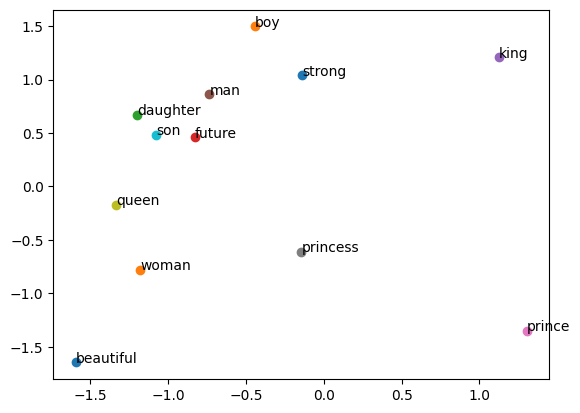

In [81]:
for word in words:
    coordinates = word_embeddings_dict[word]
    plt.scatter(coordinates[0], coordinates[1])
    plt.annotate(word, (coordinates[0], coordinates[1]))

In [89]:
# Data Preparation
corpus = "the quick brown fox jumps over the lazy dog"
tokens = corpus.split()
vocab = list(set(tokens))
vocab.sort()
vocab_size = len(vocab)
word_to_idx = {word: i for i, word in enumerate(vocab)}

# Build Training Data
window_size = 2
word_pairs = []
for i in range(len(tokens)):
    target_word = tokens[i]
    for j in range(i - window_size, i + window_size + 1):
        
        if j != i and j >= 0 and j < len(tokens):
            print(i, j)
            print(target_word, context_word)
            context_word = tokens[j]
            word_pairs.append((word_to_idx[target_word], word_to_idx[context_word]))

word_to_idx

0 1
the lazy
0 2
the quick
1 0
quick brown
1 2
quick the
1 3
quick brown
2 0
brown fox
2 1
brown the
2 3
brown quick
2 4
brown fox
3 1
fox jumps
3 2
fox quick
3 4
fox brown
3 5
fox jumps
4 2
jumps over
4 3
jumps brown
4 5
jumps fox
4 6
jumps over
5 3
over the
5 4
over fox
5 6
over jumps
5 7
over the
6 4
the lazy
6 5
the jumps
6 7
the over
6 8
the lazy
7 5
lazy dog
7 6
lazy over
7 8
lazy the
8 6
dog dog
8 7
dog the


{'brown': 0,
 'dog': 1,
 'fox': 2,
 'jumps': 3,
 'lazy': 4,
 'over': 5,
 'quick': 6,
 'the': 7}

In [86]:
word_pairs

[(7, 6),
 (7, 0),
 (6, 7),
 (6, 0),
 (6, 2),
 (0, 7),
 (0, 6),
 (0, 2),
 (0, 3),
 (2, 6),
 (2, 0),
 (2, 3),
 (2, 5),
 (3, 0),
 (3, 2),
 (3, 5),
 (3, 7),
 (5, 2),
 (5, 3),
 (5, 7),
 (5, 4),
 (7, 3),
 (7, 5),
 (7, 4),
 (7, 1),
 (4, 5),
 (4, 7),
 (4, 1),
 (1, 7),
 (1, 4)]